In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importar Arquivos do Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Relacionando Dataframe

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Metodologia/Arquivo - Colab/Painel_Covid.xlsx")

Visão Geral do DataFrame

In [ ]:
df.head()

,Info,UF,Município,Metro/Interior,Ano_Semana,Casos Acumulados,Casos novos notificados na semana epidemiológica,Óbitos Acumulados,Óbitos novos notificados na semana epidemiológica
0,COVID19Casos,SP,São Carlos,Interior,52/2022,34099,11,635,3
1,COVID19Casos,SP,São Carlos,Interior,1/2022,27471,20,542,0
2,COVID19Casos,SP,São Carlos,Interior,2/2022,27511,24,544,1
3,COVID19Casos,SP,São Carlos,Interior,3/2022,27601,31,547,2
4,COVID19Casos,SP,São Carlos,Interior,4/2022,27808,54,551,2


Separando dados importantes para análise

In [ ]:
df = df.drop(["Info","UF","Município","Metro/Interior","Casos Acumulados","Óbitos Acumulados"], axis=1)
df.head()

,Ano_Semana,Casos novos notificados na semana epidemiológica,Óbitos novos notificados na semana epidemiológica
0,52/2022,11,3
1,1/2022,20,0
2,2/2022,24,1
3,3/2022,31,2
4,4/2022,54,2


Gráficos Série Temporal Anos

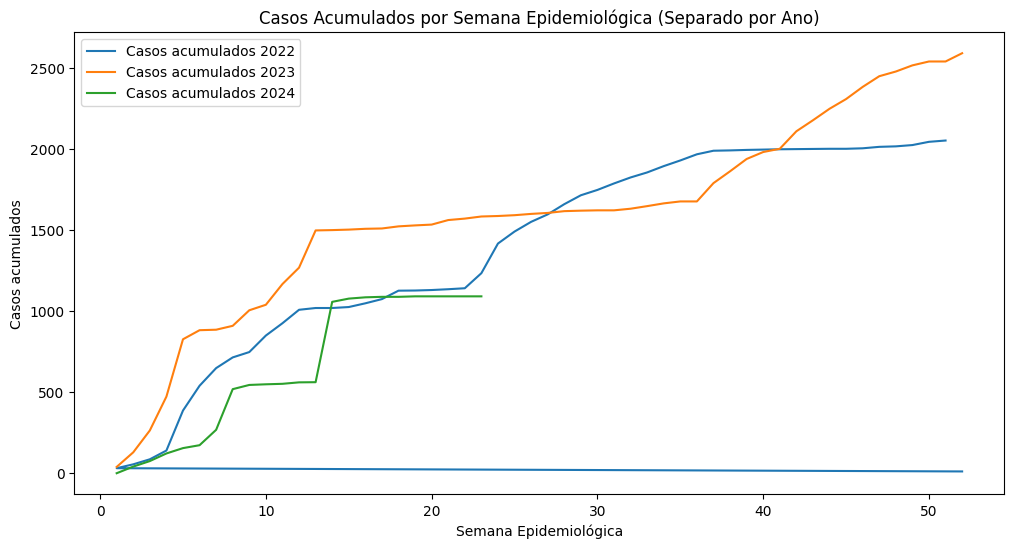

In [ ]:
# Separar a coluna Ano_Semana em Ano e Semana
df['Ano'] = df['Ano_Semana'].str.split('/').str[1].astype(int)
df['Semana'] = df['Ano_Semana'].str.split('/').str[0].astype(int)

# Calcular o total acumulado de casos por semana para cada ano
df['Casos Acumulados'] = df.groupby('Ano')['Casos novos notificados na semana epidemiológica'].cumsum()

# Plotar os dados
fig, ax = plt.subplots(figsize=(12, 6))

# Definir um conjunto de cores para cada ano
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

# Plotar os casos acumulados por ano com cores diferentes
for i, year in enumerate(df['Ano'].unique()):
    df_year = df[df['Ano'] == year]
    ax.plot(df_year['Semana'], df_year['Casos Acumulados'], label=f'Casos acumulados {year}', color=colors[i])

# Configurar os rótulos e o título
ax.set_xlabel('Semana Epidemiológica')
ax.set_ylabel('Casos acumulados')
ax.set_title('Casos Acumulados por Semana Epidemiológica (Separado por Ano)')
ax.legend()

# Mostrar o gráfico
plt.show()

Série Temporal Casos

In [ ]:
# Converter o campo "Ano_Semana" para um índice de data
df['Ano_Semana'] = pd.to_datetime(df['Ano_Semana'] + '-1', format='%W/%Y-%w')
df = df.set_index('Ano_Semana').sort_index()

# Calcular a média móvel com intervalo de 4 semanas
df['Média Móvel Casos'] = df['Casos novos notificados na semana epidemiológica'].rolling(window=4).mean()
df['Média Móvel Óbitos'] = df['Óbitos novos notificados na semana epidemiológica'].rolling(window=4).mean()
print(df)

            Casos novos notificados na semana epidemiológica  \
Ano_Semana                                                     
2022-01-03                                                20   
2022-01-10                                                24   
2022-01-17                                                31   
2022-01-24                                                54   
2022-01-31                                               247   
...                                                      ...   
2024-05-06                                                 3   
2024-05-13                                                 0   
2024-05-20                                                 0   
2024-05-27                                                 0   
2024-06-03                                                 0   

            Óbitos novos notificados na semana epidemiológica   Ano  Semana  \
Ano_Semana                                                                    
2022-01-0

Plotando médias moveis

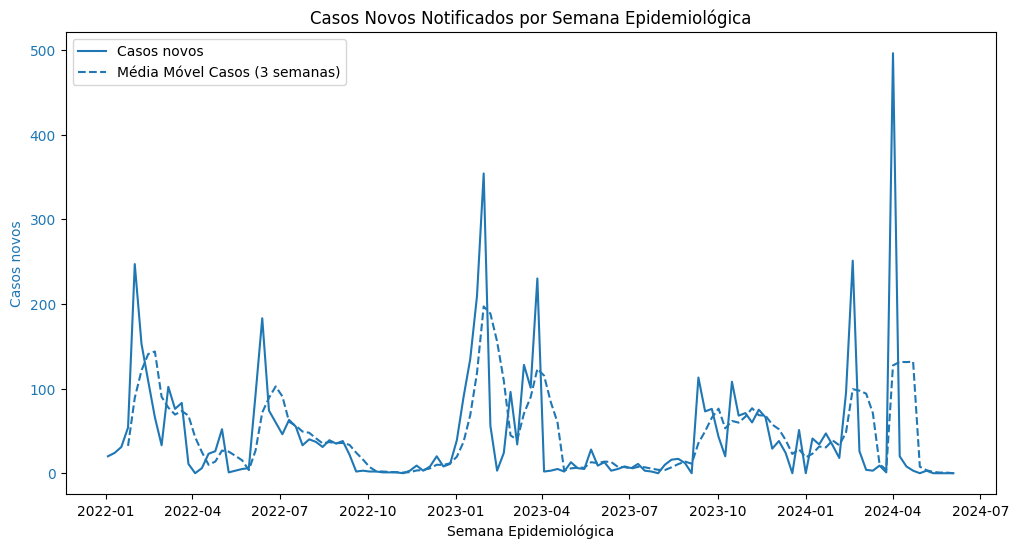

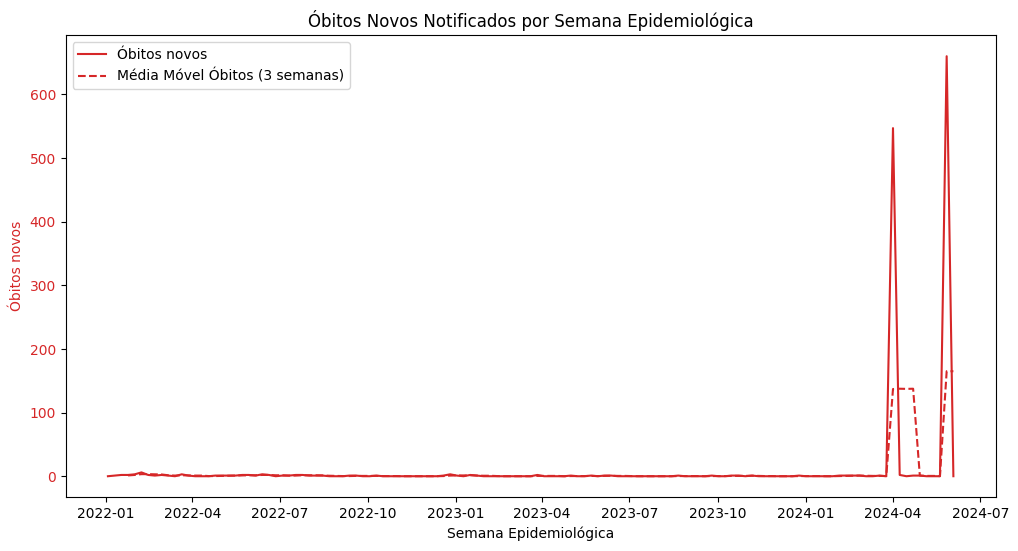

In [ ]:
# Criar a figura e os eixos para os casos novos
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotar os casos novos notificados
ax1.plot(df.index, df['Casos novos notificados na semana epidemiológica'], label='Casos novos', color='tab:blue')
ax1.plot(df.index, df['Média Móvel Casos'], label='Média Móvel Casos (3 semanas)', color='tab:blue', linestyle='--')
ax1.set_xlabel('Semana Epidemiológica')
ax1.set_ylabel('Casos novos', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Adicionar título e legendas
ax1.set_title('Casos Novos Notificados por Semana Epidemiológica')
ax1.legend()

# Criar a figura e os eixos para os óbitos novos
fig, ax2 = plt.subplots(figsize=(12, 6))

# Plotar os óbitos novos notificados
ax2.plot(df.index, df['Óbitos novos notificados na semana epidemiológica'], label='Óbitos novos', color='tab:red')
ax2.plot(df.index, df['Média Móvel Óbitos'], label='Média Móvel Óbitos (3 semanas)', color='tab:red', linestyle='--')
ax2.set_xlabel('Semana Epidemiológica')
ax2.set_ylabel('Óbitos novos', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adicionar título e legendas
ax2.set_title('Óbitos Novos Notificados por Semana Epidemiológica')
ax2.legend()

# Mostrar os gráficos
plt.show()